In [2]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Featurizer_data/train_ensemble.csv")
data_test = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Featurizer_data/test_ensemble.csv")
data_valid = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Featurizer_data/val_ensemble.csv")
data_hard_test = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/data/Official/Featurizer_data/hard_test_ensemble.csv")

In [3]:
X_train = data_train.drop(columns=['Activity'])
y_train = data_train['Activity']
X_test = data_test.drop(columns=['Activity'])
y_test = data_test['Activity']
X_valid = data_valid.drop(columns=['Activity'])
y_valid = data_valid['Activity']
X_hard_test = data_hard_test.drop(columns=['Activity'])
y_hard_test = data_hard_test['Activity']

In [4]:
from sklearn.neural_network import MLPClassifier
meta_model = MLPClassifier(alpha = 0.01, max_iter = 10000, validation_fraction = 0.1, random_state = 42, hidden_layer_sizes = 150)
meta_model.fit(X_train, y_train)
y_pred = meta_model.predict(X_test)
y_proba = meta_model.predict_proba(X_test)[:,1]

In [5]:
from sklearn.metrics import f1_score, average_precision_score, precision_recall_curve

precision_rdk5, recall_rdk5, _ = precision_recall_curve(y_test, data_test["rdk5"].values)
precision_rdk6, recall_rdk6, _ = precision_recall_curve(y_test, data_test["rdk6"].values)
precision_rdk7, recall_rdk7, _ = precision_recall_curve(y_test, data_test["rdk7"].values)
precision_mordred, recall_mordred, _ = precision_recall_curve(y_test, data_test["mordred"].values)
precision_avalon, recall_avalon, _ = precision_recall_curve(y_test, data_test["avalon"].values)
precision_ph4, recall_ph4, _ = precision_recall_curve(y_test, data_test["ph4"].values)
precision_gnn, recall_gnn, _ = precision_recall_curve(y_test, data_test["gnn"].values)
precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, y_proba)

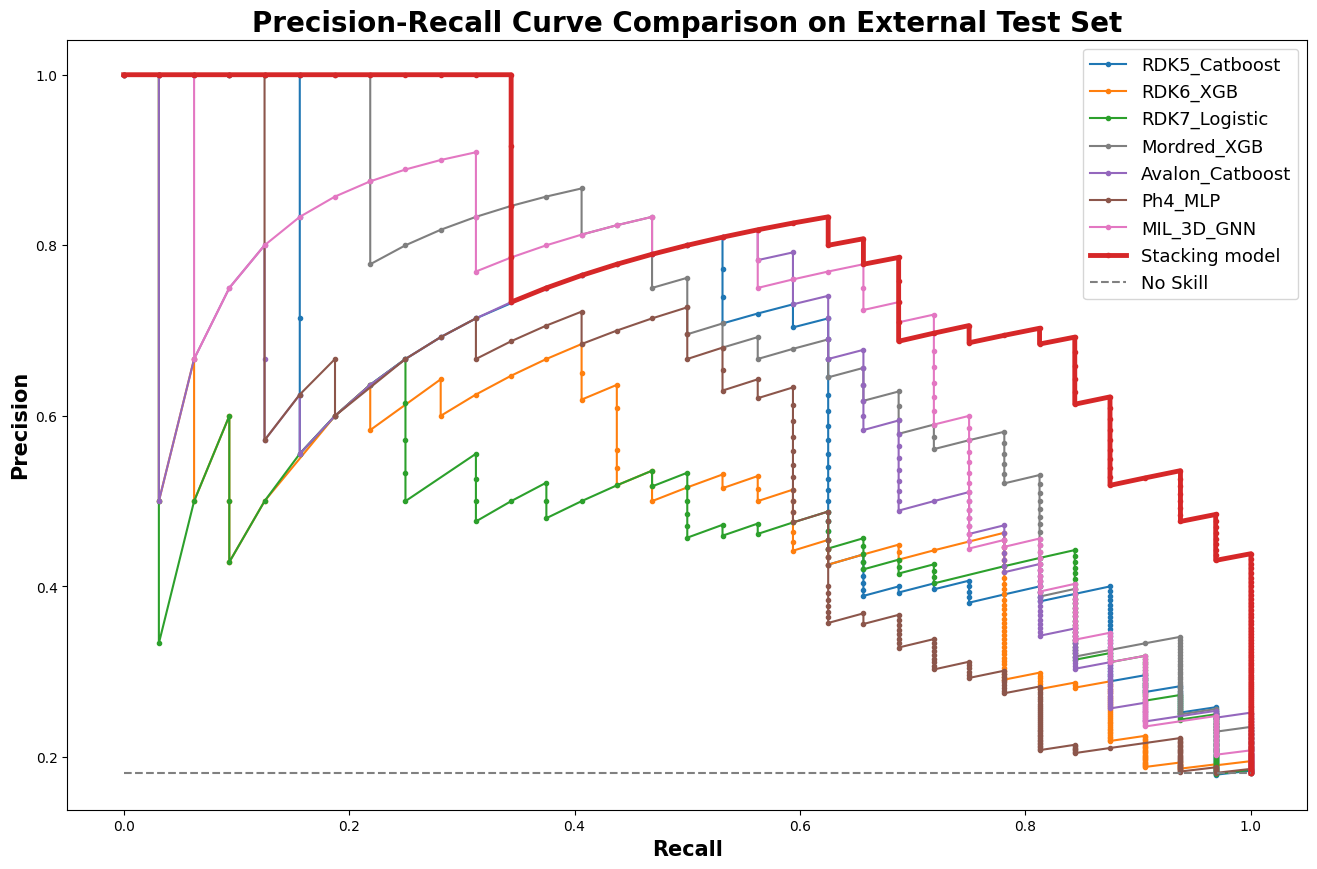

In [6]:
import matplotlib.pyplot as plt

# Define color palette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(16,10))
models = ['RDK5_Catboost', 'RDK6_XGB', 'RDK7_Logistic', 'Mordred_XGB', 'Avalon_Catboost', 'Ph4_MLP', 'MIL_3D_GNN', 'Stacking model', 'Optimized Stacking model']
# Plot Precision-Recall Curve for each model
plt.plot(recall_rdk5, precision_rdk5, marker='.', label=models[0], color=color_palette[0])
plt.plot(recall_rdk6, precision_rdk6, marker='.', label=models[1], color=color_palette[1])
plt.plot(recall_rdk7, precision_rdk7, marker='.', label=models[2], color=color_palette[2])
plt.plot(recall_mordred, precision_mordred, marker='.', label=models[3], color=color_palette[7])
plt.plot(recall_avalon, precision_avalon, marker='.', label=models[4], color=color_palette[4])
plt.plot(recall_ph4, precision_ph4, marker='.', label=models[5], color=color_palette[5])
plt.plot(recall_gnn, precision_gnn, marker='.', label=models[6], color=color_palette[6])

# Highlight ensemble model's Precision-Recall Curve
plt.plot(recall_ensemble, precision_ensemble, marker='.', label=models[7], linewidth=3.5, color=color_palette[3])

# Plot No Skill line
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='gray')

# Customize plot
plt.xlabel('Recall', fontsize=15, fontweight='bold')
plt.ylabel('Precision', fontsize=15, fontweight='bold')
plt.legend(fontsize=13)
#plt.grid(True)
plt.title('Precision-Recall Curve Comparison on External Test Set', fontsize=20, fontweight='bold')
plt.show()


In [19]:
from sklearn.metrics import f1_score, average_precision_score, precision_recall_curve, precision_score
y_proba_valid = meta_model.predict_proba(X_valid)[:,1]
val_precision_rdk5, val_recall_rdk5, _ = precision_recall_curve(y_valid, data_valid["rdk5"].values)
val_precision_rdk6, val_recall_rdk6, _ = precision_recall_curve(y_valid, data_valid["rdk6"].values)
val_precision_rdk7, val_recall_rdk7, _ = precision_recall_curve(y_valid, data_valid["rdk7"].values)
val_precision_mordred, val_recall_mordred, _ = precision_recall_curve(y_valid, data_valid["mordred"].values)
val_precision_avalon, val_recall_avalon, _ = precision_recall_curve(y_valid, data_valid["avalon"].values)
val_precision_ph4, val_recall_ph4, _ = precision_recall_curve(y_valid, data_valid["ph4"].values)
val_precision_gnn, val_recall_gnn, _ = precision_recall_curve(y_valid, data_valid["gnn"].values)
val_precision_ensemble, val_recall_ensemble, thresholds_val = precision_recall_curve(y_valid, y_proba_valid)
fscore_val = (2 * val_precision_ensemble * val_recall_ensemble) / (val_precision_ensemble + val_recall_ensemble)
# locate the index of the largest f score
ix_val = np.argmax(fscore_val)

In [22]:
y_valid

0      1
1      1
2      1
3      1
4      1
      ..
101    0
102    0
103    0
104    0
105    0
Name: Activity, Length: 106, dtype: int64

In [26]:
print("Precision on validation set threshold 0.5: ", precision_score(y_valid.values, meta_model.predict(X_valid)))
print("Precision on validation set threshold optimal: ", val_precision_ensemble[ix_val])

Precision on validation set threshold 0.5:  1.0
Precision on validation set threshold optimal:  1.0


In [25]:
thresholds_val[ix_val]

0.48257281550897785

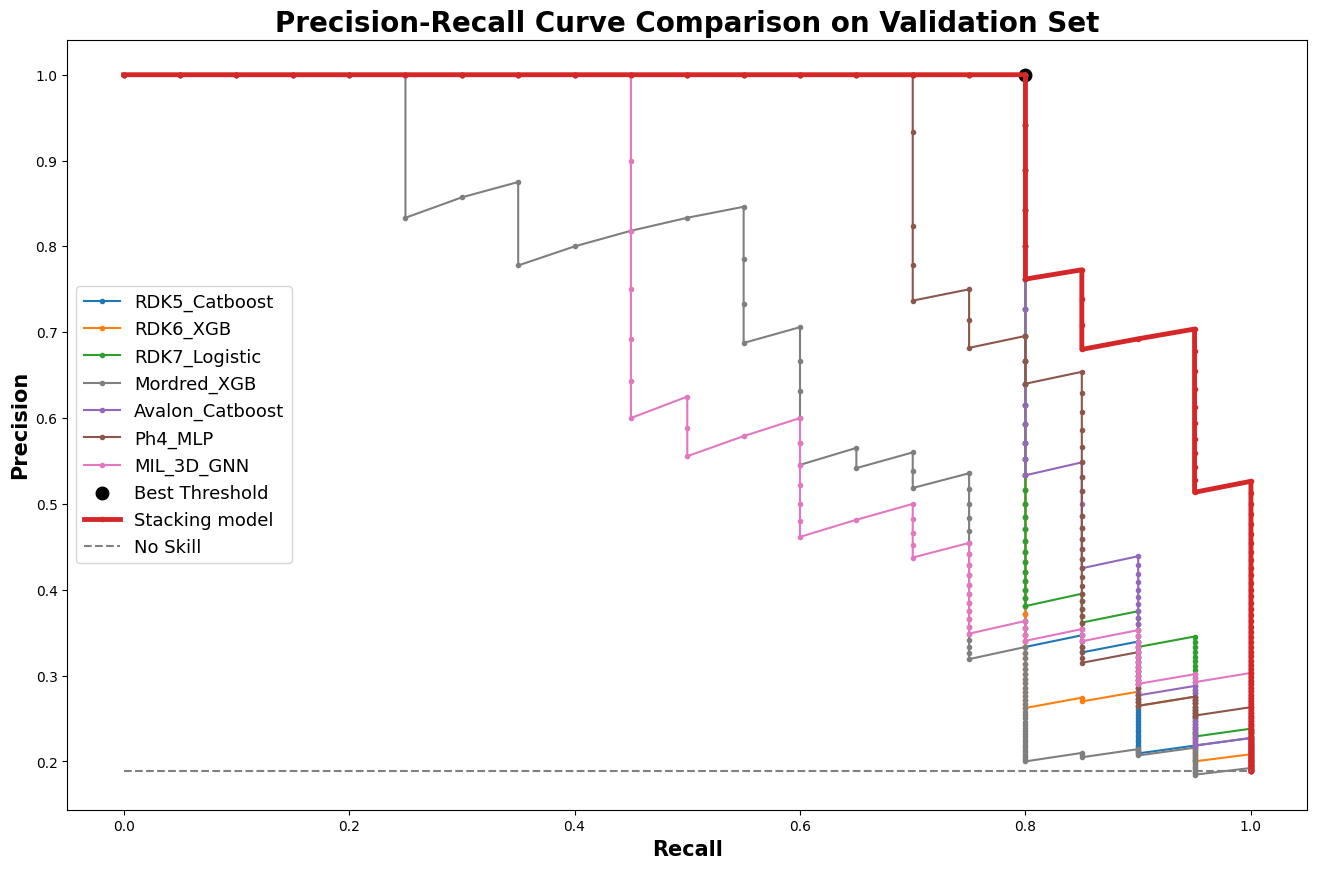

In [9]:
import matplotlib.pyplot as plt

# Define color palette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
models = ['RDK5_Catboost', 'RDK6_XGB', 'RDK7_Logistic', 'Mordred_XGB', 'Avalon_Catboost', 'Ph4_MLP', 'MIL_3D_GNN', 'Stacking model', 'Optimized Stacking model']
no_skill = len(y_valid[y_valid==1]) / len(y_valid)
plt.figure(figsize=(16,10))

# Plot Precision-Recall Curve for each model
plt.plot(val_recall_rdk5, val_precision_rdk5, marker='.', label=models[0], color=color_palette[0])
plt.plot(val_recall_rdk6, val_precision_rdk6, marker='.', label=models[1], color=color_palette[1])
plt.plot(val_recall_rdk7, val_precision_rdk7, marker='.', label=models[2], color=color_palette[2])
plt.plot(val_recall_mordred, val_precision_mordred, marker='.', label=models[3], color=color_palette[7])
plt.plot(val_recall_avalon, val_precision_avalon, marker='.', label=models[4], color=color_palette[4])
plt.plot(val_recall_ph4, val_precision_ph4, marker='.', label=models[5], color=color_palette[5])
plt.plot(val_recall_gnn, val_precision_gnn, marker='.', label=models[6], color=color_palette[6])
# Highlight ensemble model's Precision-Recall Curve
plt.scatter(val_recall_ensemble[ix_val], val_precision_ensemble[ix_val], marker='o',linewidths=4, color='black', label='Best Threshold')
plt.plot(val_recall_ensemble, val_precision_ensemble, marker='.', label=models[7], linewidth=3.5, color=color_palette[3])

# Plot No Skill line
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='gray')

# Customize plot
plt.xlabel('Recall', fontsize=15, fontweight='bold')
plt.ylabel('Precision', fontsize=15, fontweight='bold')
plt.legend(fontsize=13, loc = "center left")
#plt.grid(True)
plt.title('Precision-Recall Curve Comparison on Validation Set', fontsize=20, fontweight='bold')
plt.show()

In [17]:
from sklearn.metrics import recall_score, f1_score, balanced_accuracy_score, precision_score
data_type = ["rdk5", "rdk6", "rdk7", "mordred", "avalon", "ph4", "gnn"]
AP_values = []
for i in data_type:
    AP_values.append(average_precision_score(y_test, data_test[i].values))
AP_values.append(average_precision_score(y_test, y_proba))
AP_values.append(average_precision_score(y_test, y_proba))

F1_values, Recall_values, Balance_Accuracy_values = [], [], []
for i in data_type:
    y_pred = ((data_test[i].values) >= 0.5).astype(int)
    F1_values.append(f1_score(y_test, y_pred))
    Recall_values.append(recall_score(y_test, y_pred))
    Balance_Accuracy_values.append(balanced_accuracy_score(y_test, y_pred))
y_pred = (y_proba >= 0.5).astype(int)
print("Precision on test set threshold 0.5: ", precision_score(y_test, y_pred))
F1_values.append(f1_score(y_test, y_pred))
Recall_values.append(recall_score(y_test, y_pred))
Balance_Accuracy_values.append(balanced_accuracy_score(y_test, y_pred))

y_pred_moving_threshold = (y_proba >= thresholds_val[ix_val]).astype(int)
print("Precision on test set threshold best: ", precision_score(y_test, y_pred_moving_threshold))
F1_values.append(f1_score(y_test, y_pred_moving_threshold))
Recall_values.append(recall_score(y_test, y_pred_moving_threshold))
Balance_Accuracy_values.append(balanced_accuracy_score(y_test, y_pred_moving_threshold))


Precision on test set threshold 0.5:  0.8333333333333334
Precision on test set threshold best:  0.8076923076923077


In [14]:
from sklearn.metrics import confusion_matrix
def fprr(y_true, y_proba, threshold):
    y_pred = (y_proba >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)
HT_FPR_values = []
for i in data_type:
    HT_FPR_values.append(fprr(y_hard_test, data_hard_test[i].values, 0.5))
y_proba_hard_test = meta_model.predict_proba(X_hard_test)[:,1]
HT_FPR_values.append(fprr(y_hard_test, y_proba_hard_test, 0.5))
HT_FPR_values.append(fprr(y_hard_test, y_proba_hard_test, thresholds_val[ix_val]))


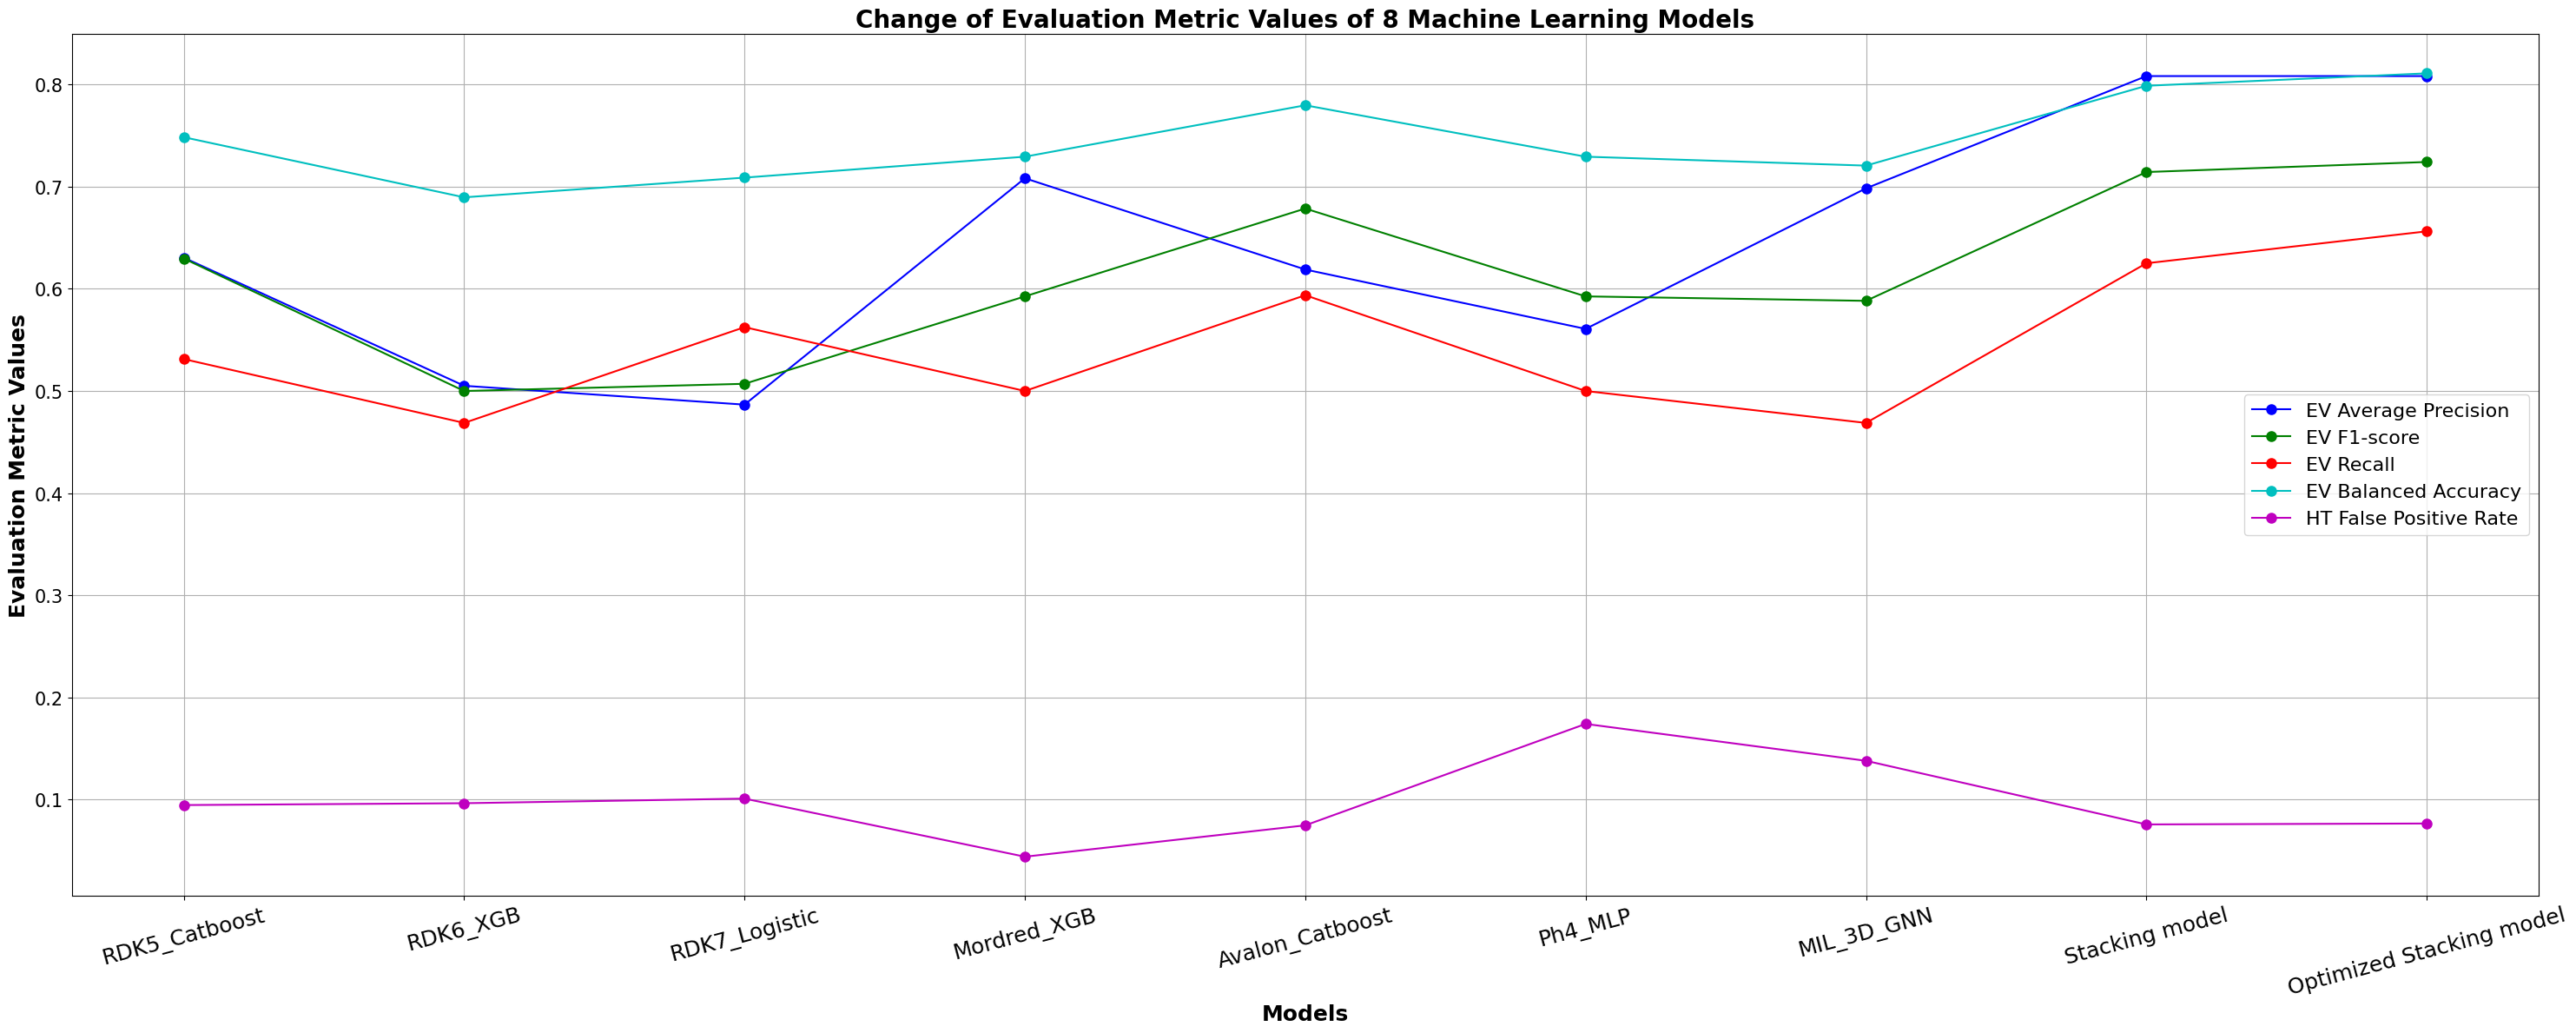

In [15]:
import matplotlib.pyplot as plt

# List of models
models = ['RDK5_Catboost', 'RDK6_XGB', 'RDK7_Logistic', 'Mordred_XGB', 'Avalon_Catboost', 'Ph4_MLP', 'MIL_3D_GNN', 'Stacking model', 'Optimized Stacking model']

# Plotting the evaluation metric values for each model
plt.figure(figsize=(30, 12))

# Plotting the lines
plt.plot(models, AP_values, marker='o', label='EV Average Precision', markersize=8, linestyle='-', color='b')
plt.plot(models, F1_values, marker='o', label='EV F1-score', markersize=8, linestyle='-', color='g')
plt.plot(models, Recall_values, marker='o', label='EV Recall', markersize=8, linestyle='-', color='r')
plt.plot(models, Balance_Accuracy_values, marker='o', label='EV Balanced Accuracy', markersize=8, linestyle='-', color='c')
plt.plot(models, HT_FPR_values, marker='o', label='HT False Positive Rate', markersize=8, linestyle='-', color='m')

# Adding labels and title
#plt.xlabel('Models', fontsize=14)
plt.ylabel('Evaluation Metric Values', fontsize=18,  fontweight='bold')
plt.xlabel('Models', fontsize=18,  fontweight='bold')
plt.title('Change of Evaluation Metric Values of 8 Machine Learning Models', fontsize=20, fontweight='bold')
plt.xticks(rotation=15, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Adding gridlines
plt.grid(True)

# Adding legend with larger font size
plt.legend(fontsize=16)

# Displaying the plot
plt.tight_layout()
plt.show()
